In [60]:
import pandas as pd
import numpy as np
from plotnine import *
import os
import warnings
from tqdm import tqdm_notebook
import gc

In [61]:
def transform_transaction_catcols(df1, df2):
    for cat_col in tqdm_notebook(categorical_features): 
        # Get the indices for NaN values
        trn_null_ind = [ind for ind, val in enumerate(df1[cat_col].isnull().values) if val == True]
        ts_null_ind = [ind for ind, val in enumerate(df2[cat_col].isnull().values) if val == True]
        
        uniq_train_cat_val , uniq_test_cat_val = set(df1[cat_col].dropna() ), set(df2[cat_col].dropna() )
        common_cat_val = uniq_train_cat_val.intersection(uniq_test_cat_val)
        df1.loc[ ~df1[cat_col].isin( common_cat_val), cat_col ] = -99999
        df2.loc[ ~df2[cat_col].isin( common_cat_val), cat_col ] = -99999
        
        # Replace the value for orignal NaN values
        df1.loc[df1.index.isin(trn_null_ind), cat_col] = np.NaN
        df2.loc[df2.index.isin(ts_null_ind), cat_col] = np.NaN
        
    del uniq_train_cat_val, uniq_test_cat_val, common_cat_val; gc.collect()

    return df1, df2

In [62]:
path = 'C:/Users/User/Documents/R_D Challenge2019/Challenge19_Car_virus_Detection/input/'
print(os.listdir(path))

['Challenge19car!', 'CHEVORLET_SPARK_Attack_free_TRAIN_Release.csv', 'CHEVORLET_SPARK_Flooding_TRAIN_Release.csv', 'CHEVORLET_SPARK_Fuzzy_TRAIN_Release.csv', 'CHEVORLET_SPARK_Malfunction_TRAIN_Release.csv', 'File_1.csv', 'File_2.csv', 'File_3.csv', 'File_4.csv', 'File_7.csv', 'File_8.csv', 'File_9.csv', 'HYUNDAI_SONATA_Attack_free_TRAIN_Release.csv', 'HYUNDAI_SONATA_Flooding_TRAIN_Release.csv', 'HYUNDAI_SONATA_Fuzzy_TRAIN_Release.csv', 'HYUNDAI_SONATA_Malfunction_TRAIN_Release.csv', 'KIA_SOUL_Attack_free_TRAIN_Release.csv', 'KIA_SOUL_Flooding_TRAIN_Release.csv', 'KIA_SOUL_Fuzzy_TRAIN_Release.csv', 'KIA_SOUL_Malfunction_TRAIN_Release.csv', '자동차용 침입 탐지 트랙 - 제출용 데이터셋.zip', '자동차용 침입 탐지 트랙 - 학습용 데이터셋.zip']


In [63]:
HYUNDAI_SONATA_Attack = pd.read_csv(path + 'HYUNDAI_SONATA_Attack_free_TRAIN_Release.csv', header=None)
HYUNDAI_SONATA_Flooding = pd.read_csv(path + 'HYUNDAI_SONATA_Flooding_TRAIN_Release.csv', header=None)
HYUNDAI_SONATA_Fuzzy = pd.read_csv(path + 'HYUNDAI_SONATA_Fuzzy_TRAIN_Release.csv', header=None)
HYUNDAI_SONATA_Malfunction = pd.read_csv(path + 'HYUNDAI_SONATA_Malfunction_TRAIN_Release.csv', header=None)

CHEVORET_SPARK_Attack = pd.read_csv(path + 'CHEVORLET_SPARK_Attack_free_TRAIN_Release.csv', header=None)
CHEVORET_SPARK_Flooding = pd.read_csv(path + 'CHEVORLET_SPARK_Flooding_TRAIN_Release.csv', header=None)
CHEVORET_SPARK_Fuzzy = pd.read_csv(path + 'CHEVORLET_SPARK_Fuzzy_TRAIN_Release.csv', header=None)
CHEVORLET_SPARK_Malfunction = pd.read_csv(path + 'CHEVORLET_SPARK_Malfunction_TRAIN_Release.csv', header=None)

KIA_SOUL_Attack = pd.read_csv(path + 'KIA_SOUL_Attack_free_TRAIN_Release.csv', header=None)
KIA_SOUL_Flooding = pd.read_csv(path + 'KIA_SOUL_Flooding_TRAIN_Release.csv', header=None)
KIA_SOUL_Fuzzy = pd.read_csv(path + 'KIA_SOUL_Fuzzy_TRAIN_Release.csv', header=None)
KIA_SOUL_Malfunction = pd.read_csv(path + 'KIA_SOUL_Malfunction_TRAIN_Release.csv', header=None)

In [64]:
for a in [HYUNDAI_SONATA_Attack, HYUNDAI_SONATA_Flooding, HYUNDAI_SONATA_Fuzzy, HYUNDAI_SONATA_Malfunction]:
    a.columns = ['Timestap', 'CANID', 'DLC', 'DataField', 'Class']
    
for a in [CHEVORET_SPARK_Attack, CHEVORET_SPARK_Flooding, CHEVORET_SPARK_Fuzzy, CHEVORLET_SPARK_Malfunction]:
    a.columns = ['Timestap', 'CANID', 'DLC', 'DataField', 'Class']
    
for a in [KIA_SOUL_Attack, KIA_SOUL_Flooding, KIA_SOUL_Fuzzy, KIA_SOUL_Malfunction]:
    a.columns = ['Timestap', 'CANID', 'DLC', 'DataField', 'Class']

In [65]:
train = pd.DataFrame()
for df in [HYUNDAI_SONATA_Attack, HYUNDAI_SONATA_Flooding, HYUNDAI_SONATA_Fuzzy, HYUNDAI_SONATA_Malfunction]:
    train = pd.concat([train, df], axis=0)
    
for df in [CHEVORET_SPARK_Attack, CHEVORET_SPARK_Flooding, CHEVORET_SPARK_Fuzzy, CHEVORLET_SPARK_Malfunction]:
    train = pd.concat([train, df], axis=0)
    
for df in [KIA_SOUL_Attack, KIA_SOUL_Flooding, KIA_SOUL_Fuzzy, KIA_SOUL_Malfunction]:
    train = pd.concat([train, df], axis=0)

In [66]:
File1 = pd.read_csv(path + 'File_1.csv', header=None)
File2 = pd.read_csv(path + 'File_2.csv', header=None)
File3 = pd.read_csv(path + 'File_3.csv', header=None)
File4 = pd.read_csv(path + 'File_4.csv', header=None)
File7 = pd.read_csv(path + 'File_7.csv', header=None)
File8 = pd.read_csv(path + 'File_8.csv', header=None)
File9 = pd.read_csv(path + 'File_9.csv', header=None)

In [67]:
test = pd.DataFrame()
for a in [File1, File2, File3, File4, File7, File8, File9]:
    a.columns = ['Number', 'Timestap', 'CANID', 'DLC', 'DataField']

for df in [File1, File2, File3, File4, File7, File8, File9]:
    test = pd.concat([test, df], axis=0)

In [68]:
test = test.reset_index(drop=True)
test['Number'] = test.index + 1

In [69]:
print(train.shape, test.shape)

(1271623, 5) (370896, 5)


### Feature Engineering

In [70]:
train['Timestap'] = pd.to_datetime(train['Timestap'], unit='s')
test['Timestap'] = pd.to_datetime(test['Timestap'], unit='s')

In [71]:
train['minute'] = train['Timestap'].dt.minute
train['second'] = train['Timestap'].dt.second

test['minute'] = test['Timestap'].dt.minute
test['second'] = test['Timestap'].dt.second

In [72]:
train['DataField_len'] = train['DataField'].astype(str).apply(lambda x: len(x.split(' ')))
test['DataField_len'] = test['DataField'].astype(str).apply(lambda x: len(x.split(' ')))

In [73]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

for num in tqdm_notebook(train['DataField_len'].unique()):
    train__df_field = train[train['DataField_len']==num].reset_index(drop=True)
    test__df_field = test[test['DataField_len']==num].reset_index(drop=True)
    for num1 in np.arange(num):
        train__df_field['DataField_{}'.format(num1)] = train__df_field['DataField'].astype(str).apply(lambda x: x.split(' ')[num1])
        test__df_field['DataField_{}'.format(num1)] = test__df_field['DataField'].astype(str).apply(lambda x: x.split(' ')[num1])
    train_df = pd.concat([train_df, train__df_field], axis=0).reset_index(drop=True)
    test_df = pd.concat([test_df, test__df_field], axis=0).reset_index(drop=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [79]:
features = [c for c in train_df.columns if c not in ['Class', 'Number', 'Timestap']]
features_columns = features
categorical_features = ['CANID','DLC', 'DataField_0','DataField_1','DataField_2','DataField_3',
                       'DataField_4','DataField_5','DataField_7','minute','second']

In [75]:
class_binary = {'R':0, 'T':1}
train_df['Class'] = train_df['Class'].map(class_binary)
train_df['Number'] = train_df.index

In [76]:
del train_df['Timestap'] ; del train_df['DataField']
del test_df['Timestap'] ; del test_df['DataField']

In [80]:
from sklearn.preprocessing import LabelEncoder

for col in tqdm_notebook(train_df.columns):
    if train_df[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(train_df[col].astype(str).values) + list(test_df[col].astype(str).values))
        train_df[col] = le.transform(list(train_df[col].astype(str).values))
        test_df[col] = le.transform(list(test_df[col].astype(str).values))   

In [81]:
train_df, test_df = transform_transaction_catcols(train_df, test_df)

In [82]:
for col in tqdm_notebook( features ):
    if train_df[col].dtype=='O':
        print(col)
        train_df[col] = train_df[col].fillna('unseen_before_label')
        test_df[col]  = test_df[col].fillna('unseen_before_label')
        
        train_df[col] = train_df[col].astype(str)
        test_df[col] = test_df[col].astype(str)
        
        le = LabelEncoder()
        le.fit(list(train_df[col])+list(test_df[col]))
        train_df[col] = le.transform(train_df[col])
        test_df[col]  = le.transform(test_df[col])
    
    elif col in categorical_features:
        train_df[col] = train_df[col].astype(float).fillna(-999)
        test_df[col]  = test_df[col].astype(float).fillna(-999)
        
        le = LabelEncoder()
        le.fit(list(train_df[col])+list(test_df[col]))
        train_df[col] = le.transform(train_df[col])
        test_df[col]  = le.transform(test_df[col])

### Tree Based Model

In [83]:
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
import random 
import os 
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [84]:
SEED = 42
seed_everything(SEED)
TARGET = 'Class'

In [88]:
########################### Model params
cat_params = {
                'n_estimators':5000,
                'learning_rate': 0.07,
                'eval_metric':'F1',
                'loss_function':'Logloss',
                'random_seed':SEED,
                'metric_period':500,
                'od_wait':500,
                'task_type':'GPU',
                'depth': 8,
                #'colsample_bylevel':0.7,
                } 

In [89]:
train_df['minute'].unique()

array([2, 3, 0, 4, 1, 5], dtype=int64)

In [90]:
test_df['minute'].unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [111]:
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit, GroupKFold
import gc

NFOLDS = 5
folds = GroupKFold(n_splits=NFOLDS)

test_df[TARGET] = 0.5 
    
X ,y = train_df[features_columns], train_df[TARGET]    
P, p_y = test_df[features_columns], test_df[TARGET]  
    
split_groups = train_df['minute']
    # We don't need original sets anymore
    # let's reduce it
oofs = train_df[['Number',TARGET]]
preds = test_df[['Number',TARGET]] 
preds['Class'] = 0
gc.collect()
    
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y, groups=split_groups)):
    print('Fold:',fold_)
        
    estimator = CatBoostClassifier(**cat_params)        
    estimator.fit(
        X.iloc[trn_idx,:],y[trn_idx],
        eval_set=(X.iloc[val_idx,:], y[val_idx]),
        cat_features=categorical_features,
        use_best_model=True,
        verbose=True)

    oof_preds = estimator.predict_proba(X.iloc[val_idx,:])[:,1]
    oof[val_idx] = (oof_preds - oof_preds.min())/(oof_preds.max() - oof_preds.min())
    preds['Class'] += estimator.predict_proba(P)[:,1]/NFOLDS
        
    gc.collect()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fold: 0
0:	learn: 0.9993858	test: 0.7036206	best: 0.7036206 (0)	total: 91.1ms	remaining: 7m 35s
500:	learn: 1.0000000	test: 0.8022677	best: 0.8051177 (114)	total: 33.2s	remaining: 4m 57s
bestTest = 0.8051177351
bestIteration = 114
Shrink model to first 115 iterations.


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fold: 1
0:	learn: 0.9991082	test: 0.0000000	best: 0.0000000 (0)	total: 111ms	remaining: 9m 14s
500:	learn: 1.0000000	test: 0.9663851	best: 0.9663851 (486)	total: 40.8s	remaining: 6m 6s
1000:	learn: 1.0000000	test: 0.9671757	best: 0.9689756 (610)	total: 1m 18s	remaining: 5m 15s
1500:	learn: 1.0000000	test: 0.9710028	best: 0.9710376 (1463)	total: 1m 57s	remaining: 4m 33s
2000:	learn: 1.0000000	test: 0.9731816	best: 0.9736360 (1991)	total: 2m 35s	remaining: 3m 53s
bestTest = 0.9736360045
bestIteration = 1991
Shrink model to first 1992 iterations.
Fold: 2
0:	learn: 0.9989197	test: 0.9959636	best: 0.9959636 (0)	total: 145ms	remaining: 12m 7s
500:	learn: 1.0000000	test: 0.9935311	best: 0.9977022 (12)	total: 49.4s	remaining: 7m 23s
bestTest = 0.9977022423
bestIteration = 12
Shrink model to first 13 iterations.
Fold: 3
0:	learn: 0.9987811	test: 1.0000000	best: 1.0000000 (0)	total: 139ms	remaining: 11m 32s
500:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 57.7s	remaining: 8m 37s


In [112]:
feature_score = pd.DataFrame()
feature_score['feature'] = features
feature_score['score'] = estimator.get_feature_importance()
feature_score = feature_score.sort_values(by='score', ascending=False)
feature_score

,feature,score
0,CANID,33.736560
6,DataField_4,22.922851
9,DataField_7,20.783309
3,DataField_1,14.087212
11,minute,3.559810
7,DataField_5,3.467725
12,second,0.780539
5,DataField_3,0.661994
1,DLC,0.000000
2,DataField_0,0.000000


In [113]:
from sklearn.metrics import f1_score

best_threshold_dict = {}
for threshold in tqdm_notebook(np.linspace(0,1, 100)):
    temp_f1_score = f1_score(y, [ 1 if x >=threshold else 0 for x in oof])
    best_threshold_dict[threshold] = temp_f1_score

In [117]:
best_threshold_dict

{0.0: 0.14430009376105887,
 0.010101010101010102: 0.6643230908314877,
 0.020202020202020204: 0.7095282710691351,
 0.030303030303030304: 0.7442417396215758,
 0.04040404040404041: 0.7714392768488595,
 0.05050505050505051: 0.7811015110078493,
 0.06060606060606061: 0.778735123519556,
 0.07070707070707072: 0.7740769234003018,
 0.08080808080808081: 0.7840867304339552,
 0.09090909090909091: 0.799322593022179,
 0.10101010101010102: 0.8093634731662008,
 0.11111111111111112: 0.8185455826430978,
 0.12121212121212122: 0.8228041184695564,
 0.13131313131313133: 0.8277455802631519,
 0.14141414141414144: 0.8293401665598975,
 0.15151515151515152: 0.8547108505892397,
 0.16161616161616163: 0.855550048384432,
 0.17171717171717174: 0.8560389941622112,
 0.18181818181818182: 0.8574591594873467,
 0.19191919191919193: 0.8671824536724705,
 0.20202020202020204: 0.8688119879775081,
 0.21212121212121213: 0.8739819168173598,
 0.22222222222222224: 0.8776852300242132,
 0.23232323232323235: 0.8799864051272093,
 0.2424

In [114]:
max(best_threshold_dict.values())

0.934151581522506

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269B0851160>]],
      dtype=object)

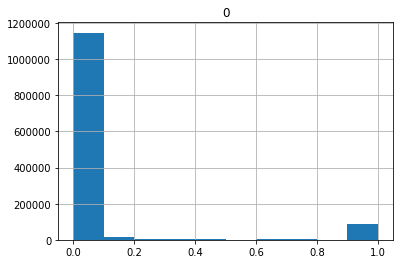

In [116]:
pd.DataFrame(oof).hist()

In [118]:
preds['Class'] = preds['Class'].apply(lambda x: 'R' if x <= 0.7676767676767677 else 'T')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
preds = preds.sort_values(by='Number')
preds = preds.reset_index(drop=True)

In [120]:
preds.to_csv("Tree_based.csv",index=False)

In [123]:
preds.shape

(370896, 2)